# Thresholding, Filtros e Detecção

Com a finalidade de exercitar os assuntos estudados em sala de aula, este trabalho se propõe a usar os conceitos de Thresholding, Filtros e Detecção com as bibliotecas matplotlib e skimage para extração de detalhes na face de animais(ou até mesmo de pessoas).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline


In [12]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

## Imagem Original

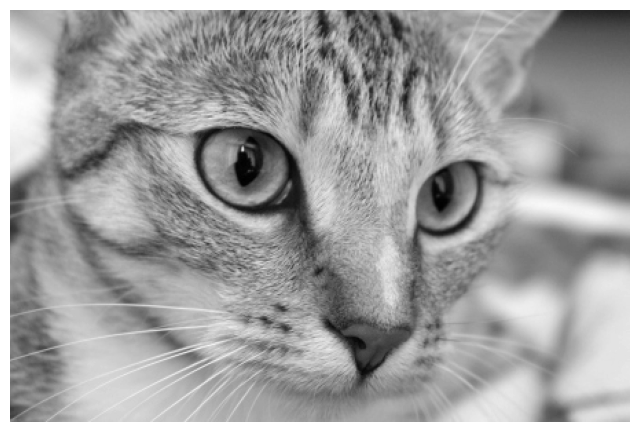

In [13]:
img = skic.rgb2gray(skid.cat())
show(img)

## Aplicando Filtro Gaussiano

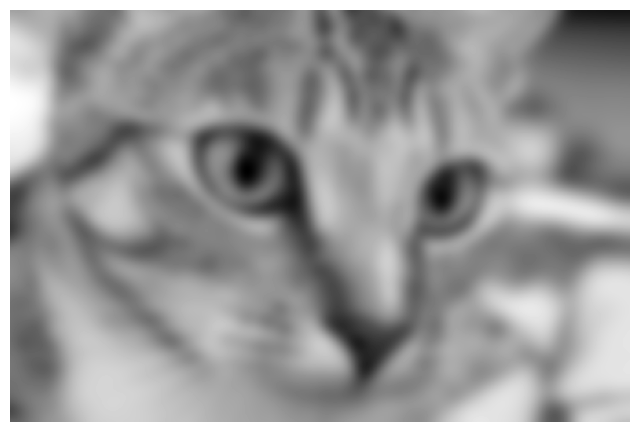

In [14]:
show(skif.gaussian(img, 5.))

## Detectando bordas com filtro

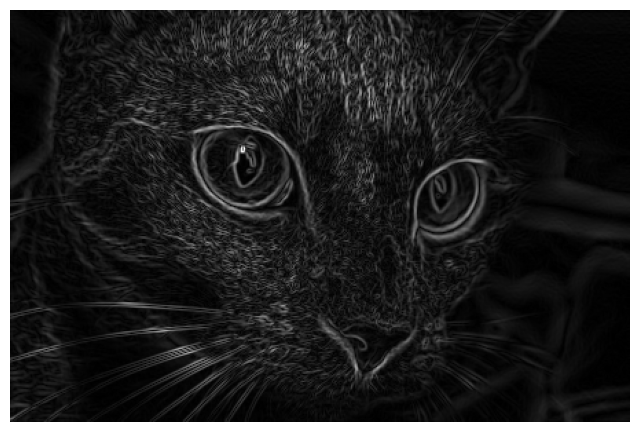

In [15]:
sobimg = skif.sobel(img)
show(sobimg)

## Thresholding Dinâmico da Imagem Filtrada com Slider

In [10]:
from ipywidgets import widgets

@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(sobimg < x)

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _do…

## Adicionando "noise" a um pedaço da Imagem 

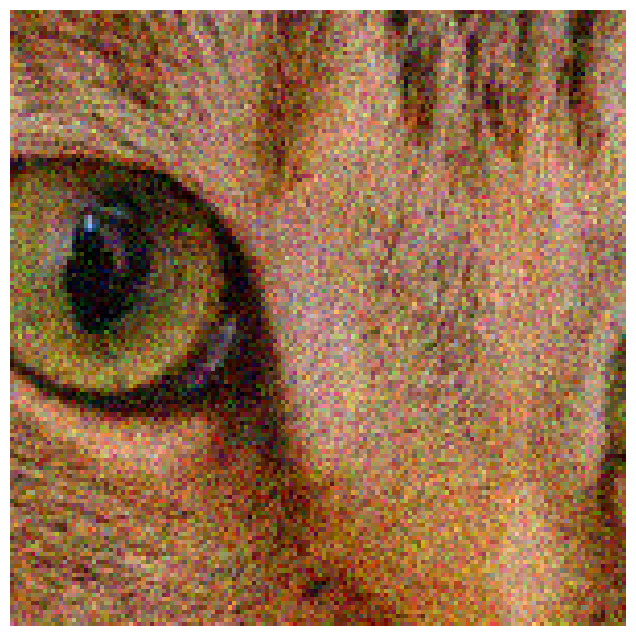

In [56]:
img = skimage.img_as_float(skid.cat())

img = img[50:200, 150:300]

img_n = sku.random_noise(img)
show(img_n)


## Adicionando Filtro de "denoise" a Imagem e comparando-as

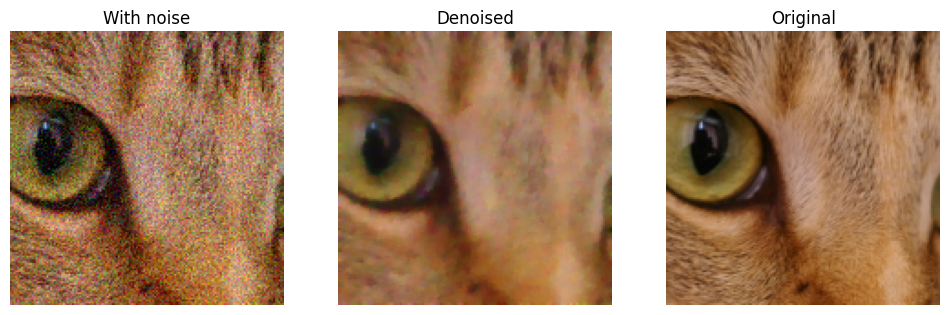

In [57]:
img_r = skimage.restoration.denoise_tv_bregman(
    img_n, 5.)

fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 8))

ax1.imshow(img_n)
ax1.set_title('With noise')
ax1.set_axis_off()

ax2.imshow(img_r)
ax2.set_title('Denoised')
ax2.set_axis_off()

ax3.imshow(img)
ax3.set_title('Original')
ax3.set_axis_off()